# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Classification/Social_Network_Ads.csv

Mounted at /content/drive
/content/drive/MyDrive/MachineLearning/Part3_Classification/Section15_K-Nearest_Neighbors_(K-NN)/Python


## Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

len(X_train), len(X_test), len(y_train), len(y_test)

(320, 80, 320, 80)

## Feature Scaling

Why use feature scaling?
* Because KNN algorithm rely on distance between k-neighbours, it's would be easier for computer to learning if the feature is scaled.

In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Training the K-NN model on the Training set

In [7]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,p=2, metric='minkowski')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting a new result

In [8]:
classifier.predict(sc_X.transform([[30, 200000]]))

array([1])

## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cf_matrix, accuracy

(array([[55,  3],
        [ 1, 21]]), 0.95)

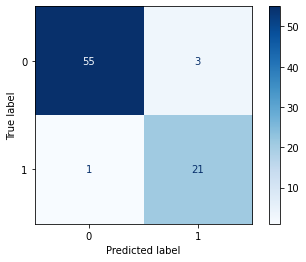

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

## Visualising the Training set results

No handles with labels found to put in legend.


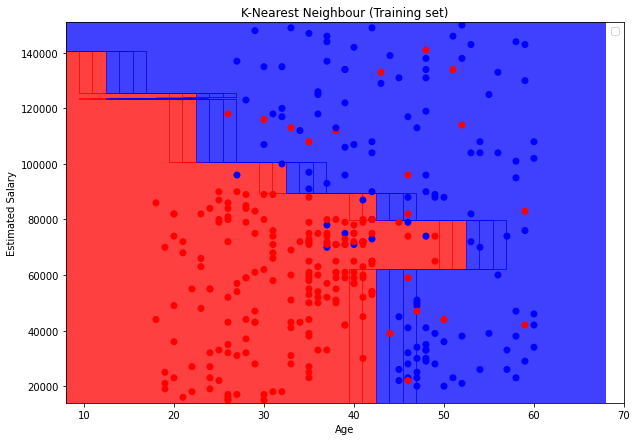

In [26]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_train), y_train

X1_min, X1_max = X_set[:,0].min()-10, X_set[:,0].max()+10
X2_min, X2_max = X_set[:,1].min()-1000, X_set[:,1].max()+1000


X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, 10),
                     np.arange(X2_min, X2_max, 10))

# X_in = np.concatenate([X1.reshape(-1,1), X2.reshape(-1,1)], axis=1)
X_in = np.array([X1.ravel(), X2.ravel()]).T
# X_in.shape, np.array([X1.ravel(), X2.ravel()]).T.shape, X1.shape, X2.shape
X_in = sc_X.transform(X_in)
# predicting
y_pred = classifier.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red", "blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))

plt.title('K-Nearest Neighbour (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])

xx, yy = np.meshgrid(xvalues, yvalues)
xx, yy

## Visualising the Test set results

No handles with labels found to put in legend.


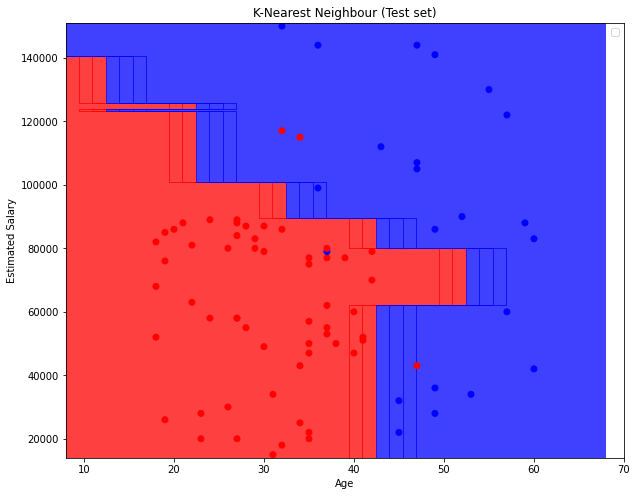

In [25]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_test), y_test

X1_min, X1_max = X_set[:,0].min()-10, X_set[:,0].max()+10
X2_min, X2_max = X_set[:,1].min()-1000, X_set[:,1].max()+1000


X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, 10),
                     np.arange(X2_min, X2_max, 10))

X_in = np.concatenate([X1.reshape(-1,1), X2.reshape(-1,1)], axis=1)
# X_in = np.array([X1.ravel(), X2.ravel()]).T
# X_in.shape, np.array([X1.ravel(), X2.ravel()]).T.shape, X1.shape, X2.shape
X_in = sc_X.transform(X_in)
# predicting
y_pred = classifier.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,8))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red", "blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_test, cmap=ListedColormap(("red", "blue")))

plt.title('K-Nearest Neighbour (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()